Comparison plot saved to: final_plots\ogfts_comparison_precision_recall_mean_std.png


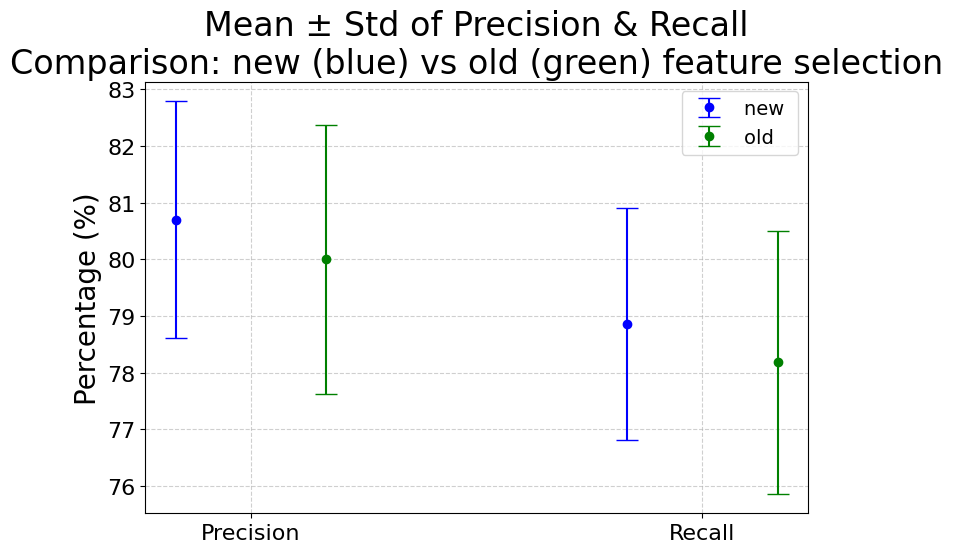

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Two folders to compare
folder1 = 'evaluations/RS_1000'   # RS1000 (new)
folder2 = 'evaluations/ogfts'     # OGFTS (old)
output_folder = 'final_plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall

def gather_metrics(folder):
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    precisions, recalls = [], []
    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)
    return precisions, recalls

def plot_mean_std_side_by_side():
    precisions1, recalls1 = gather_metrics(folder1)  # RS1000 (new)
    precisions2, recalls2 = gather_metrics(folder2)  # OGFTS (old)

    fig, ax = plt.subplots(figsize=(8, 6))

    # Compute mean and std
    means1 = [np.mean(precisions1), np.mean(recalls1)]
    stds1 = [np.std(precisions1), np.std(recalls1)]

    means2 = [np.mean(precisions2), np.mean(recalls2)]
    stds2 = [np.std(precisions2), np.std(recalls2)]

    # X positions (grouped like boxplots)
    positions_precision = [1, 2]   # Precision: new, old
    positions_recall = [4, 5]      # Recall: new, old

    # Plot error bars (no connecting lines)
    ax.errorbar(positions_precision[0], means1[0], yerr=stds1[0],
                fmt='o', capsize=8, color="blue", label="new ")
    ax.errorbar(positions_precision[1], means2[0], yerr=stds2[0],
                fmt='o', capsize=8, color="green", label="old ")
    ax.errorbar(positions_recall[0], means1[1], yerr=stds1[1],
                fmt='o', capsize=8, color="blue")
    ax.errorbar(positions_recall[1], means2[1], yerr=stds2[1],
                fmt='o', capsize=8, color="green")

    # X labels in center of groups
    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["Precision", "Recall"])

    # Labels, title, grid
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Mean ± Std of Precision & Recall\nComparison: new (blue) vs old (green) feature selection")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

    # Save & show
    output_path = os.path.join(output_folder, 'ogfts_comparison_precision_recall_mean_std.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Comparison plot saved to: {output_path}")
    plt.show()
    plt.close(fig)

# Run
plot_mean_std_side_by_side()


Comparison plot saved to: final_plots\Ansatz_comparison_precision_recall_mean_std.png


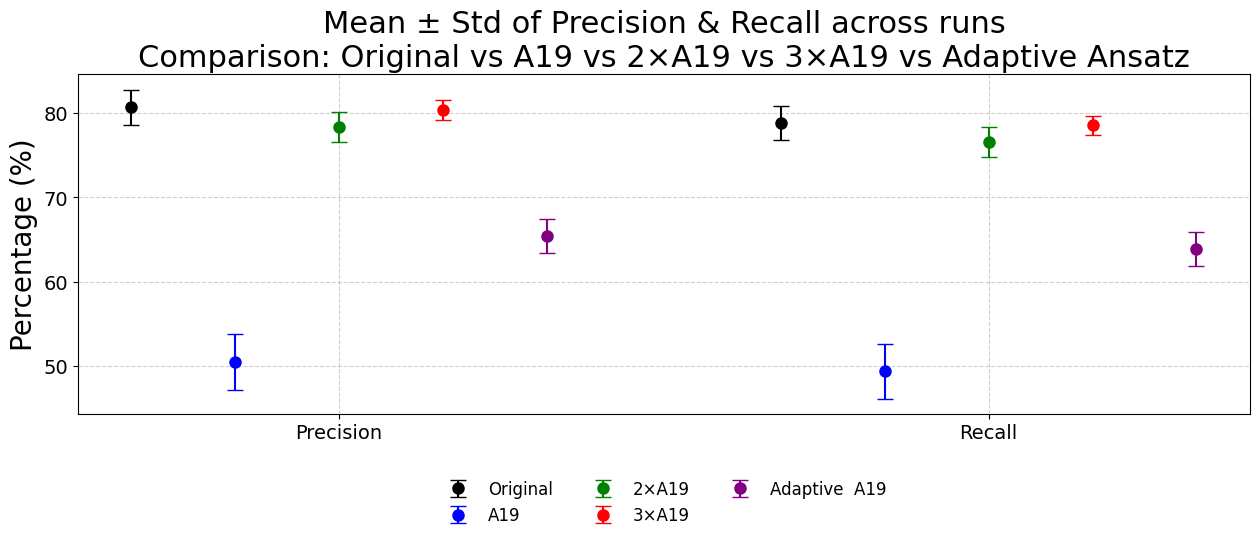

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 20,       # base font size
    "axes.titlesize": 22,  # title
    "axes.labelsize": 20,  # x/y labels
    "xtick.labelsize": 14, # x tick labels
    "ytick.labelsize": 14, # y tick labels
    "legend.fontsize": 12  # legend
})

# Five folders to compare
folder1 = 'evaluations/A19'        # A19
folder2 = 'evaluations/A19_tt'     # 2 * A19
folder3 = 'evaluations/A19_ttt'    # 3 * A19
folder4 = 'evaluations/A19_adapt'  # Adaptive Ansatz
folder5 = 'evaluations/RS_1000'    # Original Ansatz (RS_1000)

output_folder = 'final_plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall

def gather_metrics(folder):
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    precisions, recalls = [], []
    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)
    return precisions, recalls

def plot_mean_std_side_by_side():
    # Gather all data
    precisions1, recalls1 = gather_metrics(folder1)  # A19
    precisions2, recalls2 = gather_metrics(folder2)  # 2 * A19
    precisions3, recalls3 = gather_metrics(folder3)  # 3 * A19
    precisions4, recalls4 = gather_metrics(folder4)  # Adaptive Ansatz
    precisions5, recalls5 = gather_metrics(folder5)  # Original Ansatz (RS_1000)

    fig, ax = plt.subplots(figsize=(13, 6))

    # Compute mean and std for each method
    methods = {
        "Original": (precisions5, recalls5, "black"),
        "A19": (precisions1, recalls1, "blue"),
        "2×A19": (precisions2, recalls2, "green"),
        "3×A19": (precisions3, recalls3, "red"),
        "Adaptive  A19": (precisions4, recalls4, "purple"),
    }

    # Group centers: 0 for Precision, 1 for Recall
    groups = [0, 1]
    width = 0.16  # horizontal spacing between methods

    for j, (label, (precisions, recalls, color)) in enumerate(methods.items()):
        mean_prec, std_prec = np.mean(precisions), np.std(precisions)
        mean_rec, std_rec = np.mean(recalls), np.std(recalls)

        # Offset each method within group
        offset = (j - (len(methods)-1)/2) * width

        ax.errorbar(groups[0] + offset, mean_prec, yerr=std_prec,
                    fmt='o', capsize=6, markersize=8, color=color, label=label)
        ax.errorbar(groups[1] + offset, mean_rec, yerr=std_rec,
                    fmt='o', capsize=6, markersize=8, color=color)

    # X labels in center of groups
    ax.set_xticks(groups)
    ax.set_xticklabels(["Precision", "Recall"])

    # Labels, title, grid
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Mean ± Std of Precision & Recall across runs\n"
                 "Comparison: Original vs A19 vs 2×A19 vs 3×A19 vs Adaptive Ansatz")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
    )

    # Save & show
    output_path = os.path.join(output_folder, 'Ansatz_comparison_precision_recall_mean_std.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Comparison plot saved to: {output_path}")
    plt.show()
    plt.close(fig)

# Run
plot_mean_std_side_by_side()

Comparison plot saved to: final_plots\1000vs500_comparison_precision_recall_mean_std.png


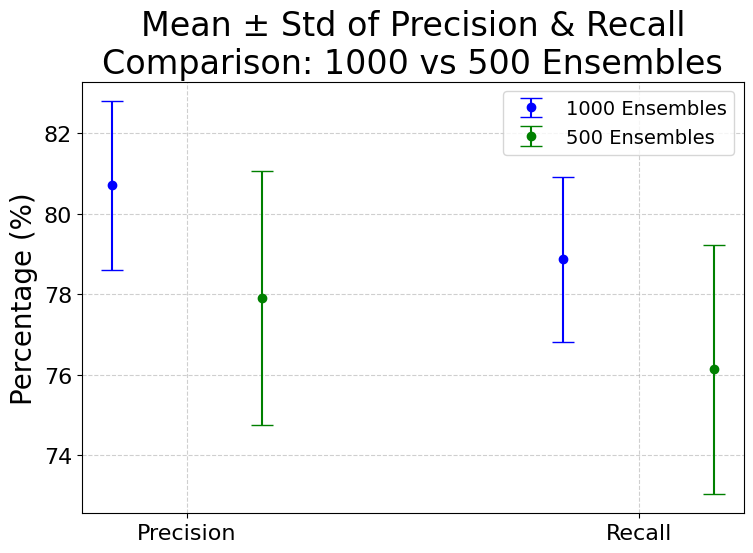

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 22,       # base font size
    "axes.titlesize": 24,  # title
    "axes.labelsize": 20,  # x/y labels
    "xtick.labelsize": 16, # x tick labels
    "ytick.labelsize": 16, # y tick labels
    "legend.fontsize": 14  # legend
})

# Two folders to compare
folder1 = 'evaluations/RS_1000'   # RS1000 (new)
folder2 = 'evaluations/RS_500'     # OGFTS (old)
output_folder = 'final_plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    precision = None
    recall = None
    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)
    return precision, recall

def gather_metrics(folder):
    txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    precisions, recalls = [], []
    for filename in txt_files:
        file_path = os.path.join(folder, filename)
        precision, recall = extract_metrics(file_path)
        if precision is not None:
            precisions.append(precision)
        if recall is not None:
            recalls.append(recall)
    return precisions, recalls

def plot_mean_std_side_by_side():
    precisions1, recalls1 = gather_metrics(folder1)  # RS1000 (new)
    precisions2, recalls2 = gather_metrics(folder2)  # OGFTS (old)

    fig, ax = plt.subplots(figsize=(8, 6))

    # Compute mean and std
    means1 = [np.mean(precisions1), np.mean(recalls1)]
    stds1 = [np.std(precisions1), np.std(recalls1)]

    means2 = [np.mean(precisions2), np.mean(recalls2)]
    stds2 = [np.std(precisions2), np.std(recalls2)]

    # X positions (grouped like boxplots)
    positions_precision = [1, 2]   # Precision: new, old
    positions_recall = [4, 5]      # Recall: new, old

    # Plot error bars (no connecting lines)
    ax.errorbar(positions_precision[0], means1[0], yerr=stds1[0],
                fmt='o', capsize=8, color="blue", label="1000 Ensembles")
    ax.errorbar(positions_precision[1], means2[0], yerr=stds2[0],
                fmt='o', capsize=8, color="green", label="500 Ensembles")
    ax.errorbar(positions_recall[0], means1[1], yerr=stds1[1],
                fmt='o', capsize=8, color="blue")
    ax.errorbar(positions_recall[1], means2[1], yerr=stds2[1],
                fmt='o', capsize=8, color="green")

    # X labels in center of groups
    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["Precision", "Recall"])

    # Labels, title, grid
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Mean ± Std of Precision & Recall\nComparison: 1000 vs 500 Ensembles")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

    # Save & show
    output_path = os.path.join(output_folder, '1000vs500_comparison_precision_recall_mean_std.png')
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Comparison plot saved to: {output_path}")
    plt.show()
    plt.close(fig)

# Run
plot_mean_std_side_by_side()